In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['titanicdataset-traincsv', 'titanic-for-me']


number of passengers in original data 891


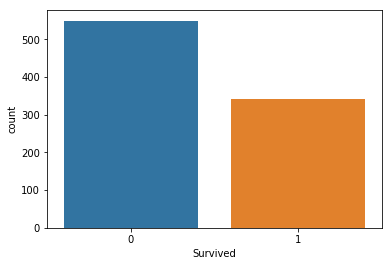

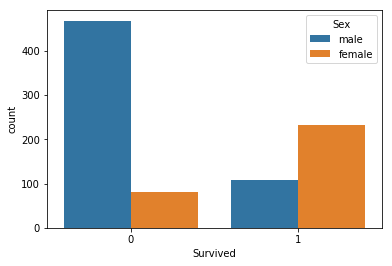

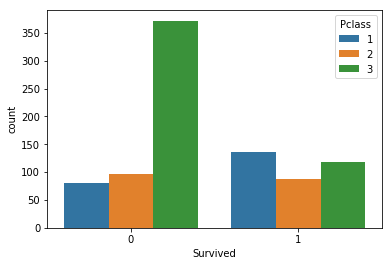

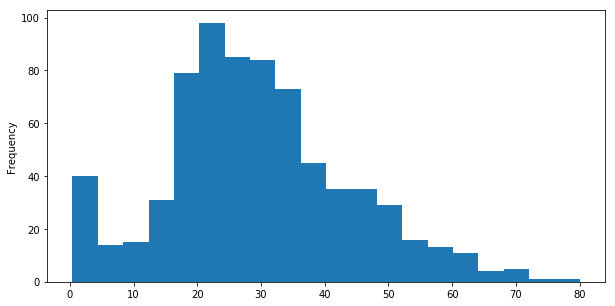

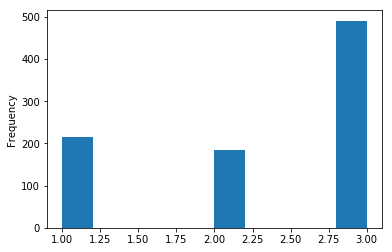

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


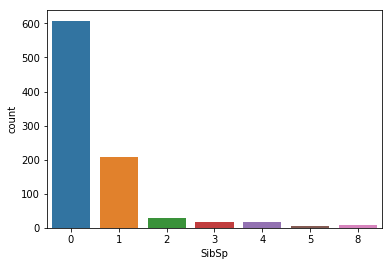

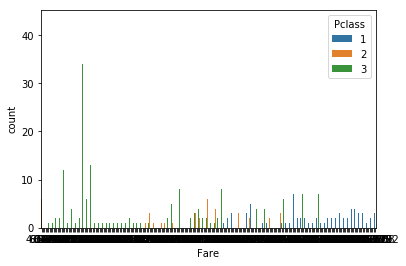

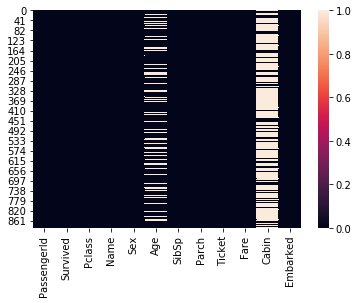

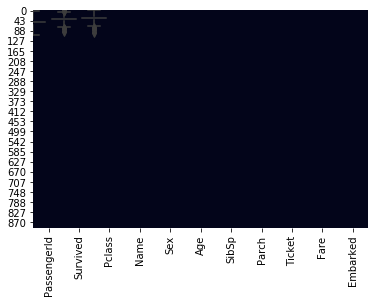

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7850467289719626

In [2]:
#Getting data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

titanic_data=pd.read_csv("../input/titanic-for-me/train.csv")

titanic_data.head(10)

print("number of passengers in original data "+str(len(titanic_data.index)))

#Analysing data

sns.countplot(x="Survived",data=titanic_data)
plt.show()
sns.countplot(x="Survived", hue="Sex", data=titanic_data)
plt.show()
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)
plt.show()

titanic_data["Age"].plot.hist(bins=20,figsize=(10,5))
plt.show()
titanic_data["Pclass"].plot.hist()
plt.show()
titanic_data.info()

sns.countplot(x="SibSp",data=titanic_data)
plt.show()
sns.countplot(x="Fare",hue="Pclass",data=titanic_data)
plt.show()
#Data Wrangling

titanic_data.isnull().sum()

sns.heatmap(titanic_data.isnull())
plt.show()
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

titanic_data.drop("Cabin", axis=1, inplace=True)

titanic_data.head(5)

titanic_data.dropna(inplace=True)

sns.heatmap(titanic_data.isnull(),cbar=False)
plt.show()

titanic_data.isnull().sum()

sex= pd.get_dummies(titanic_data["Sex"],drop_first=True)

sex.head(5)

embark=pd.get_dummies(titanic_data["Embarked"], drop_first=True)

embark.head(5)

Pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)

Pcl.head(9)

titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)

titanic_data.head(5)

Clean_data=titanic_data.drop(["PassengerId","Sex","Pclass","Name","Embarked","Ticket"],axis=1)

Clean_data.head(5)

#Training

X=Clean_data.drop("Survived",axis=1)
y=Clean_data["Survived"]

from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()

logmodel.fit(X_train, y_train)

predictions=logmodel.predict(X_test)

from sklearn.metrics import classification_report

classification_report(y_test, predictions)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)